# Importing the libraries and loading the data set


In [658]:
# Importing Libraries required.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

from umap import UMAP


In [659]:
# Loading the data from the file.
data = pd.read_csv('mh.csv')

In [660]:
# Changing columns to a better format and removing the trailing spaces and replacing some valeus.
data.columns = [
    'is_self_employed',
    'number_of_employees',
    'is_tech_company',
    'is_role_tech_related',
    'provides_mental_health_benefits',
    'aware_of_mental_health_options',
    'employer_discusses_mental_health',
    'employer_resources_for_mental_health',
    'anonymity_protected_for_treatment',
    'request_medical_leave_due_to_mental_health',
    'fear_negative_consequences_discussing_mental_health',
    'fear_negative_consequences_discussing_physical_health',
    'comfortable_discussing_mental_health_with_coworkers',
    'comfortable_discussing_mental_health_with_supervisors',
    'employer_takes_mental_health_seriously',
    'observed_negative_consequences_for_open_discussions',
    'has_medical_coverage_for_mental_health',
    'aware_of_local_or_online_mental_health_resources',
    'disclosed_mental_health_issue_to_clients',
    'disclosure_impact_on_relationships_with_clients',
    'disclosed_mental_health_issue_to_coworkers',
    'disclosure_impact_on_relationships_with_coworkers',
    'productivity_impacted_by_mental_health',
    'percentage_of_work_time_impacted_by_mental_health',
    'has_previous_employers',
    'previous_employers_provided_mental_health_benefits',
    'aware_of_mental_health_options_with_previous_employers',
    'previous_employers_discussed_mental_health',
    'previous_employers_resources_for_mental_health',
    'anonymity_protected_for_previous_employers',
    'fear_negative_consequences_discussing_mental_health_previous',
    'fear_negative_consequences_discussing_physical_health_previous',
    'willing_to_discuss_mental_health_with_previous_coworkers',
    'willing_to_discuss_mental_health_with_previous_supervisors',
    'previous_employers_took_mental_health_seriously',
    'observed_negative_consequences_for_coworkers_previous',
    'willing_to_discuss_physical_health_in_interview',
    'reason_for_willingness_to_discuss_physical_health',
    'willing_to_discuss_mental_health_in_interview',
    'reason_for_willingness_to_discuss_mental_health',
    'fear_career_impact_from_mental_health_disclosure',
    'fear_negative_view_from_coworkers_due_to_mental_health',
    'willing_to_share_mental_health_with_friends_family',
    'observed_unsupportive_response_to_mental_health_issues',
    'impact_of_observing_others_on_disclosure_of_mental_health',
    'family_history_of_mental_illness',
    'history_of_mental_health_disorder',
    'current_mental_health_disorder',
    'diagnosed_conditions',
    'suspected_conditions',
    'diagnosed_by_professional',
    'diagnosed_conditions_by_professional',
    'sought_treatment_for_mental_health',
    'treatment_interference_with_work_when_effectively_treated',
    'treatment_interference_with_work_when_not_effectively_treated',
    'age',
    'gender',
    'country_of_residence',
    'us_state_or_territory_of_residence',
    'country_of_work',
    'us_state_or_territory_of_work',
    'work_position',
    'works_remotely'
]

data = data.map(lambda x: x.strip().lower() if isinstance(x, str) else x)

data = data.replace({
    "maybe": 'uncertain',
    "i don't know": 'uncertain',
    "i'm not sure": 'uncertain',
    "i am not sure": 'uncertain',
    "unsure": 'uncertain',
    "maybe/not sure": 'uncertain',
    "n/a (not currently aware)": 'inapplicable',
    "not applicable to me": 'inapplicable',
    "not eligible for coverage / n/a": 'inapplicable',
    "not applicable to me (i do not have a mental illness)": 'inapplicable',    
    })

data.to_csv('MH2.csv', index=False)

# Familiarizing with the data

In [661]:
# Visualising the number of rows and columns 
print(data.shape)

(1433, 63)


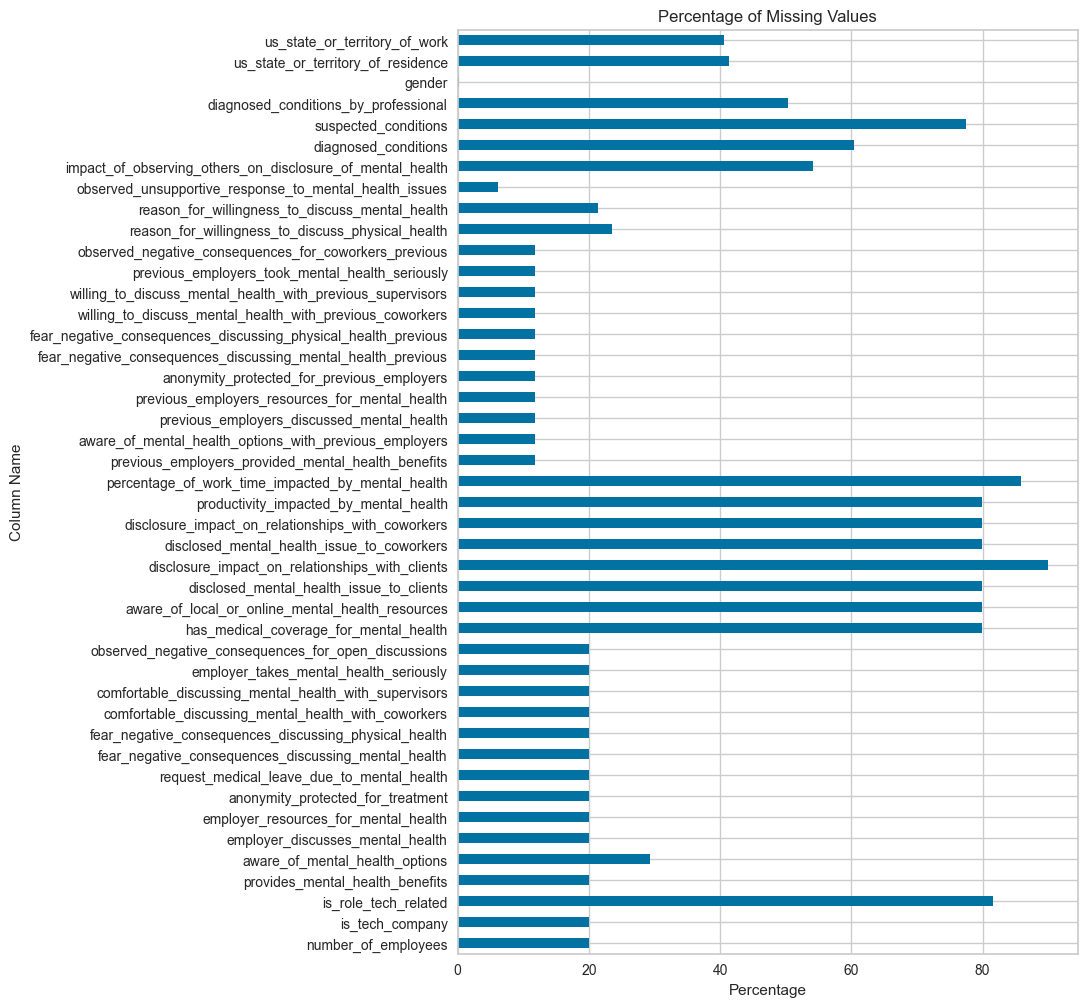

Numebr of Columns with Missing Values:  44 

'number_of_employees' is missing: 287 values
'is_tech_company' is missing: 287 values
'is_role_tech_related' is missing: 1170 values
'provides_mental_health_benefits' is missing: 287 values
'aware_of_mental_health_options' is missing: 420 values
'employer_discusses_mental_health' is missing: 287 values
'employer_resources_for_mental_health' is missing: 287 values
'anonymity_protected_for_treatment' is missing: 287 values
'request_medical_leave_due_to_mental_health' is missing: 287 values
'fear_negative_consequences_discussing_mental_health' is missing: 287 values
'fear_negative_consequences_discussing_physical_health' is missing: 287 values
'comfortable_discussing_mental_health_with_coworkers' is missing: 287 values
'comfortable_discussing_mental_health_with_supervisors' is missing: 287 values
'employer_takes_mental_health_seriously' is missing: 287 values
'observed_negative_consequences_for_open_discussions' is missing: 287 values
'has_medi

In [662]:
# visualising the percentage of valeus missing
missing_values = data.isnull().sum() * 100 / len(data)
missing_values_columns = missing_values[missing_values > 0]

plt.figure(figsize=(8,12))
missing_values_columns.plot(kind='barh')
plt.title('Percentage of Missing Values')
plt.ylabel('Column Name')
plt.xlabel('Percentage')
plt.show()

print("Numebr of Columns with Missing Values: ",len(missing_values_columns),"\n")
for column in missing_values_columns.keys():
    print(f"'{column}' is missing: {data[column].isnull().sum()} values")

# Preproccessing the data

In [663]:
# Cleaning specific columns
data['observed_unsupportive_response_to_mental_health_issues'] = data['observed_unsupportive_response_to_mental_health_issues'].apply(lambda x: "yes" if isinstance(x, str) and 'yes' in x else x)

data['percentage_of_work_time_impacted_by_mental_health'] = data['percentage_of_work_time_impacted_by_mental_health'].map({
    "1-25%": 0.25,
    "26-50%": 0.5,
    "51-75%": 0.75,
    "76-100%": 1.0
    })

data['fear_negative_view_from_coworkers_due_to_mental_health'] = data['fear_negative_view_from_coworkers_due_to_mental_health'].replace({
    'yes, i think they would': 'yes, I think so',
    "no, i don't think they would": "no, I don't think so",
    'yes, they do': 'yes, I experienced it',
    'no, they do not': "no, I didn't experience it"
})

data['fear_career_impact_from_mental_health_disclosure'] = data['fear_career_impact_from_mental_health_disclosure'].replace({
    'yes, i think it would': 'yes, I think so',
    "no, i don't think it would": "no, I don't think so",
    'yes, it has': 'yes, I experienced it',
    'no, it has not': "no, I didn't experience it"
})

In [664]:
# Cleaning values to match the format
mapping = {
    "all":["all", "yes", "always"],
    "some":["some", "sometimes"],
    "none":["none","no","never"]
}

def mapping_function(x):
    if isinstance(x, str) and x not in ["uncertain", "inapplicable"]:
        for key, values in mapping.items():
            if any(value in x for value in values):
                return key
    else:
        return x

for column in data.select_dtypes(include=['object']).columns:
    if len(data[column].value_counts()) == 2:
        data[column] = data[column].map({"yes": 1, "no": 0})

    if len(data[column].value_counts()) == 3 and not set(data[column].value_counts().index) == {"yes", "no", "uncertain"}:
        data[column] = data[column].apply(mapping_function)

    if len(data[column].value_counts()) == 4 and not set(data[column].value_counts().index) == {"yes", "no", "uncertain", "inapplicable"}:
        data[column] = data[column].apply(mapping_function)

In [665]:
# Cleaning specific columns
man = ["male","m","malr","sex is male","mail" , "dude","m|",
        "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?",
        "male.", "man"]
woman = ["f","woman", "female", "fm", " female", "female/woman",
         "female (props for making this a freeform field, though)",
         "fem", "female ", "i identify as female."]

data["gender"] = data["gender"].replace(man, "man")
data["gender"] = data["gender"].replace(woman, "woman")
data["gender"] = data["gender"].apply(lambda x: "diverse" if x not in ["man", "woman"] else x)

category_map = {
    "Management":["supervisor", "team lead", "leadership", "executive"],
    "Development":["back", "developer", "front", "devops", "sysadmin", "dev"],
}

def categorize_role(role):
    for key, values in category_map.items():
        if any(value in role for value in values):
            return key
    return "Other"

data['work_position'] = data['work_position'].apply(categorize_role)

top_countries = list(data['country_of_residence'].value_counts().head(11).index)

data['country_of_residence'] = data['country_of_residence'].apply(lambda x: x if x in top_countries else 'other')
data['country_of_work'] = data['country_of_work'].apply(lambda x: x if x in top_countries else 'other')

data['us_state_or_territory_of_residence'] = data['us_state_or_territory_of_residence'].apply(lambda x: x if isinstance(x, str) else 'not specified')
data['us_state_or_territory_of_work'] = data['us_state_or_territory_of_work'].apply(lambda x: x if isinstance(x, str) else 'not specified')

data["number_of_employees"] = data["number_of_employees"].replace({
    "more than 1000":"above 1000",
    "500-1000":"500 to 1000",
    "100-500":"100 to 500",
    "26-100":"26 to 100",
    "6-25":"6 to 25",
    "1-5":"1 to 5",
})

data['age'] = data['age'].apply(lambda x: x if x < 80 and x >= 18 else np.nan)

In [666]:
# Handle missing values
numerical_cols = data.select_dtypes(include=['number']).columns
num_imputer = SimpleImputer(strategy='median')
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])

categorical_cols = data.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

In [667]:
# Reasons
reasons = [
    'reason_for_willingness_to_discuss_physical_health',
    'reason_for_willingness_to_discuss_mental_health'
]

mapping = {
    "stigma": ["stigma", "acceptance"],
    "uncertain": ["uncertain","idk"],
    "wont_discuss": ["private", "privacy", "relevant", "none", "business", "concern", "useless", "information", "know","because","problems"],
    "honesty": ["honesty","fortunate","problem", "open", "transparent", "honest", "acceptable", "accepted", "aware", "personal", "not an issue", ],
    "bias": ["bias"]
}

def mapping_reasons(x):
    if isinstance(x, str):
        for key, values in mapping.items():
            if any(value in x for value in values):
                return key
        return "other" 
    else:
        return x

for reason in reasons:
    data[reason] = data[reason].apply(mapping_reasons)

In [668]:
# Simplifying age
data['age'] = pd.cut(data['age'], bins=[18, 30, 40, 50, 60, 70], 
                     labels=['18 to 30', '30 to 40', '40 to 50', '50 to 60', '60+'], 
                     right=False).fillna('60+')
data['age'] = data['age'].astype('object')

# Converting Binary Columns
for column in data.columns:
    if data[column].nunique() == 2:
        data[column] = data[column].replace({1: "yes", 0: "no"}).astype('object')

# Save the data as a CSV file called "Altered_MH.csv"
data.to_csv('Altered_MH.csv', index=False)

# Encoding and scalling

In [669]:
# Prepare for Encoding
YN_cols = []
YNM_cols = []
NSA_cols = []
YNMU_cols = []
NSAM_cols = []
fifth_col = []
sixth_col = []
multi_col = []
IDK_cols = []

for column in data.columns:
    if data[column].nunique() == 2:
        YN_cols.append(column)

for column in data.columns:
    if data[column].nunique() == 3:
        if {"yes", "no", 'uncertain'} == set(data[column].unique()):
            YNM_cols.append(column)
        elif {"some", "none", "all"} == set(data[column].unique()):
            NSA_cols.append(column)
        else:
            IDK_cols.append(column)

for column in data.columns:
    if data[column].nunique() == 4:
        if {"yes", "no", 'uncertain', 'inapplicable'} == set(data[column].unique()):
            YNMU_cols.append(column)
        elif {"some", "none", "all", "uncertain"} == set(data[column].unique()) or {"some", "none", "all", "inapplicable"} == set(data[column].unique()):
            NSAM_cols.append(column)

for column in data.columns:
    if data[column].nunique() == 5:
        if column == 'age':
            IDK_cols.append(column)
        else:
            fifth_col.append(column)

for column in data.columns:
    if data[column].nunique() == 6:
        if column == 'number_of_employees':
            IDK_cols.append(column)
        else:
            sixth_col.append(column)

for column in data.columns:
    if data[column].nunique() > 6:
        multi_col.append(column)

#for sete in [fifth_col, sixth_col,]:
#    print("")
#    for column in sete:
#        print(column, data[column].unique())

In [670]:
# Use Label Encoding for binary categorical columns
label_encoders = {col: LabelEncoder() for col in YN_cols}
for col in YN_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

for col in YNM_cols:
    data[col] = label_encoders.get(col, LabelEncoder()).fit_transform(data[col])

for col in YNMU_cols:
    data[col] = label_encoders.get(col, LabelEncoder()).fit_transform(data[col])

In [671]:
# Ordinal Encoding
ordinal_mapping = {'none': 0, 'some': 1, 'all': 2}
for col in NSA_cols:
    data[col] = data[col].map(ordinal_mapping)

ordinal_mapping = {'inapplicable': -1, 'uncertain':-1 , 'none': 0, 'some': 1, 'all': 2}
for col in NSAM_cols:
    data[col] = data[col].map(ordinal_mapping)

disclosure_mapping = {"inapplicable": -1, "no, because it doesn't matter": 0, "no, because it would impact me negatively": 1, "sometimes, if it comes up": 2, "yes, always": 3}
data['disclosed_mental_health_issue_to_clients'] = data['disclosed_mental_health_issue_to_clients'].map(disclosure_mapping)
data['disclosed_mental_health_issue_to_coworkers'] = data['disclosed_mental_health_issue_to_coworkers'].map(disclosure_mapping)

fear_impact_mapping = {"uncertain": -1, "no, I don't think so": 0, "no, I didn't experience it": 1, "yes, I think so": 2, "yes, I experienced it": 3}
data['fear_career_impact_from_mental_health_disclosure'] = data['fear_career_impact_from_mental_health_disclosure'].map(fear_impact_mapping)
data['fear_negative_view_from_coworkers_due_to_mental_health'] = data['fear_negative_view_from_coworkers_due_to_mental_health'].map(fear_impact_mapping)

interference_mapping = {"inapplicable": -1, "never": 0, "rarely": 1, "sometimes": 2, "often": 3}
data['treatment_interference_with_work_when_effectively_treated'] = data['treatment_interference_with_work_when_effectively_treated'].map(interference_mapping)
data['treatment_interference_with_work_when_not_effectively_treated'] = data['treatment_interference_with_work_when_not_effectively_treated'].map(interference_mapping)

leave_difficulty_mapping = {"uncertain": -1, "very easy": 4, "somewhat easy": 3, "neither easy nor difficult": 2, "somewhat difficult": 1, "very difficult": 0}
data['request_medical_leave_due_to_mental_health'] = data['request_medical_leave_due_to_mental_health'].map(leave_difficulty_mapping)

sharing_openness_mapping = {
    "inapplicable": -1, "not open at all": 0, "somewhat not open": 1, "neutral": 2, "somewhat open": 3, "very open": 4}
data['willing_to_share_mental_health_with_friends_family'] = data['willing_to_share_mental_health_with_friends_family'].map(sharing_openness_mapping)

In [672]:
# Cleaning conditions
conditions = [
    'diagnosed_conditions',
    'suspected_conditions',
    'diagnosed_conditions_by_professional'
    ]

condition_categories = {
    # Anxiety and Mood Disorders
    "anxiety disorder (generalized, social, phobia, etc)": "anxiety_and_mood_disorders",
    "stress response syndromes": "anxiety_and_mood_disorders",
    "obsessive-compulsive disorder": "anxiety_and_mood_disorders",
    "i haven't been formally diagnosed, so i felt uncomfortable answering, but social anxiety and depression.": "anxiety_and_mood_disorders",
    "mood disorder (depression, bipolar disorder, etc)": "anxiety_and_mood_disorders",
    "depression": "anxiety_and_mood_disorders",
    "seasonal affective disorder": "anxiety_and_mood_disorders",
    "post-partum / anxiety": "anxiety_and_mood_disorders",
    # Neurodevelopmental and Behavioral Disorders
    'combination of physical impairment (strongly near-sighted) with a possibly mental one (mcd / "adhd", though its actually a stimulus filtering impairment)': "neurodevelopmental_and_behavioral_disorders",
    "autism - while not a 'mental illness', still greatly affects how i handle anxiety": "neurodevelopmental_and_behavioral_disorders",
    "attention deficit hyperactivity disorder": "neurodevelopmental_and_behavioral_disorders",
    "pervasive developmental disorder (not otherwise specified)": "neurodevelopmental_and_behavioral_disorders",
    "pdd-nos": "neurodevelopmental_and_behavioral_disorders",
    "autism (asperger's)": "neurodevelopmental_and_behavioral_disorders",
    "asperger's": "neurodevelopmental_and_behavioral_disorders",
    "autism": "neurodevelopmental_and_behavioral_disorders",
    "pdd-nos (see above)": "neurodevelopmental_and_behavioral_disorders",
    'autism - while not a "mental illness", still greatly affects how i handle anxiety': "neurodevelopmental_and_behavioral_disorders",
    "asperges": "neurodevelopmental_and_behavioral_disorders",
    "aspergers": "neurodevelopmental_and_behavioral_disorders",
    "autism spectrum disorder": "neurodevelopmental_and_behavioral_disorders",
    "asperger syndrome": "neurodevelopmental_and_behavioral_disorders",
    "add (w/o hyperactivity)": "neurodevelopmental_and_behavioral_disorders",
    "attention deficit disorder": "neurodevelopmental_and_behavioral_disorders",
    """mcd (when it was diagnosed, the ultra-mega "disorder" adhd didn't exist yet)""": "neurodevelopmental_and_behavioral_disorders",
    "attention deficit disorder (but not the hyperactive version)": "neurodevelopmental_and_behavioral_disorders",
    # Trauma and Stress-Related Disorders
    "posttraumatic stress disourder": "trauma_and_stress_related_disorders",
    "dissociative disorder": "trauma_and_stress_related_disorders",
    "post-traumatic stress disorder": "trauma_and_stress_related_disorders",
    "ptsd (undiagnosed)": "trauma_and_stress_related_disorders",
    "posttraumatic stress disorder": "trauma_and_stress_related_disorders",
    "burn out": "trauma_and_stress_related_disorders",
    "burnout": "trauma_and_stress_related_disorders",
    "depersonalisation": "trauma_and_stress_related_disorders",
    "depersonalization disorder": "trauma_and_stress_related_disorders",
    # Substance and Addiction Disorders
    "substance use disorder": "substance_and_addiction_disorders",
    "addictive disorder": "substance_and_addiction_disorders",
    "sexual addiction": "substance_and_addiction_disorders",
    # Personality and Psychotic Disorders
    "personality disorder (borderline, antisocial, paranoid, etc)": "personality_and_psychotic_disorders",
    "schizotypal personality disorder": "personality_and_psychotic_disorders",
    "psychotic disorder (schizophrenia, schizoaffective, etc)": "personality_and_psychotic_disorders",
    # Sexual and Gender Identity Disorders
    "gender dysphoria": "sexual_and_gender_identity_disorders",
    "transgender": "sexual_and_gender_identity_disorders",
    "gender identity disorder": "sexual_and_gender_identity_disorders",
    "intimate disorder": "sexual_and_gender_identity_disorders",
    # Neurological Disorders
    "traumatic brain injury": "neurological_disorders",
    "tinnitus": "neurological_disorders",
    # Crisis and Mental Health Conditions
    "suicidal ideation": "crisis_and_mental_health_conditions",
    "we're all hurt, right?!": "crisis_and_mental_health_conditions",
    # Other
    "sleeping disorder": "sleep_disorders",
    "eating disorder (anorexia, bulimia, etc)": "eating_disorders",
}

def standardize_conditions(conditions_column, mapping_dict):
    standardized_conditions = []
    for condition in conditions_column:
        conditions_list = condition.split('|')
        standardized_conditions.append(
            [mapping_dict.get(cond.strip(), "Other") for cond in conditions_list]
        )
    return standardized_conditions

for condition in data[conditions]:
    data[condition] = standardize_conditions(data[condition], condition_categories)

# Encoding the conditions
#unique_condition_values = []
#for condition in conditions:
#    unique_condition_values.extend(data[condition].explode().unique())
#
#unique_condition_values = list(set(unique_condition_values))

#mlb = MultiLabelBinarizer(classes=unique_condition_values)
#mlb.fit(pd.concat([data[condition] for condition in conditions]))
#
#for condition in conditions:
#    encoded = mlb.transform(data[condition])
#    encoded_data = pd.DataFrame(encoded, columns=mlb.classes_)
#    data = pd.concat([data, encoded_data], axis=1)
#    data.drop(condition, axis=1, inplace=True)

for condition in conditions:
    mlb = MultiLabelBinarizer()
    mlb.fit(data[condition])
    encoded = mlb.transform(data[condition])
    encoded_data = pd.DataFrame(encoded, columns=condition+"_"+mlb.classes_)
    data = pd.concat([data, encoded_data], axis=1)
    data.drop(condition, axis=1, inplace=True)

In [673]:
# Calculate frequency counts for each categorical column
freq_enc_cols = list(set(IDK_cols + multi_col + reasons) - set(conditions))
for col in freq_enc_cols:
    data[col] = data[col].map(data[col].value_counts())

In [674]:
# Complex categorical columns (One-Hot Encoding)
#multi_col = list(set(multi_col) - set(conditions))
#data = pd.get_dummies(data, columns=IDK_cols+multi_col+reasons, drop_first=True)

In [675]:
# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data) 
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)  


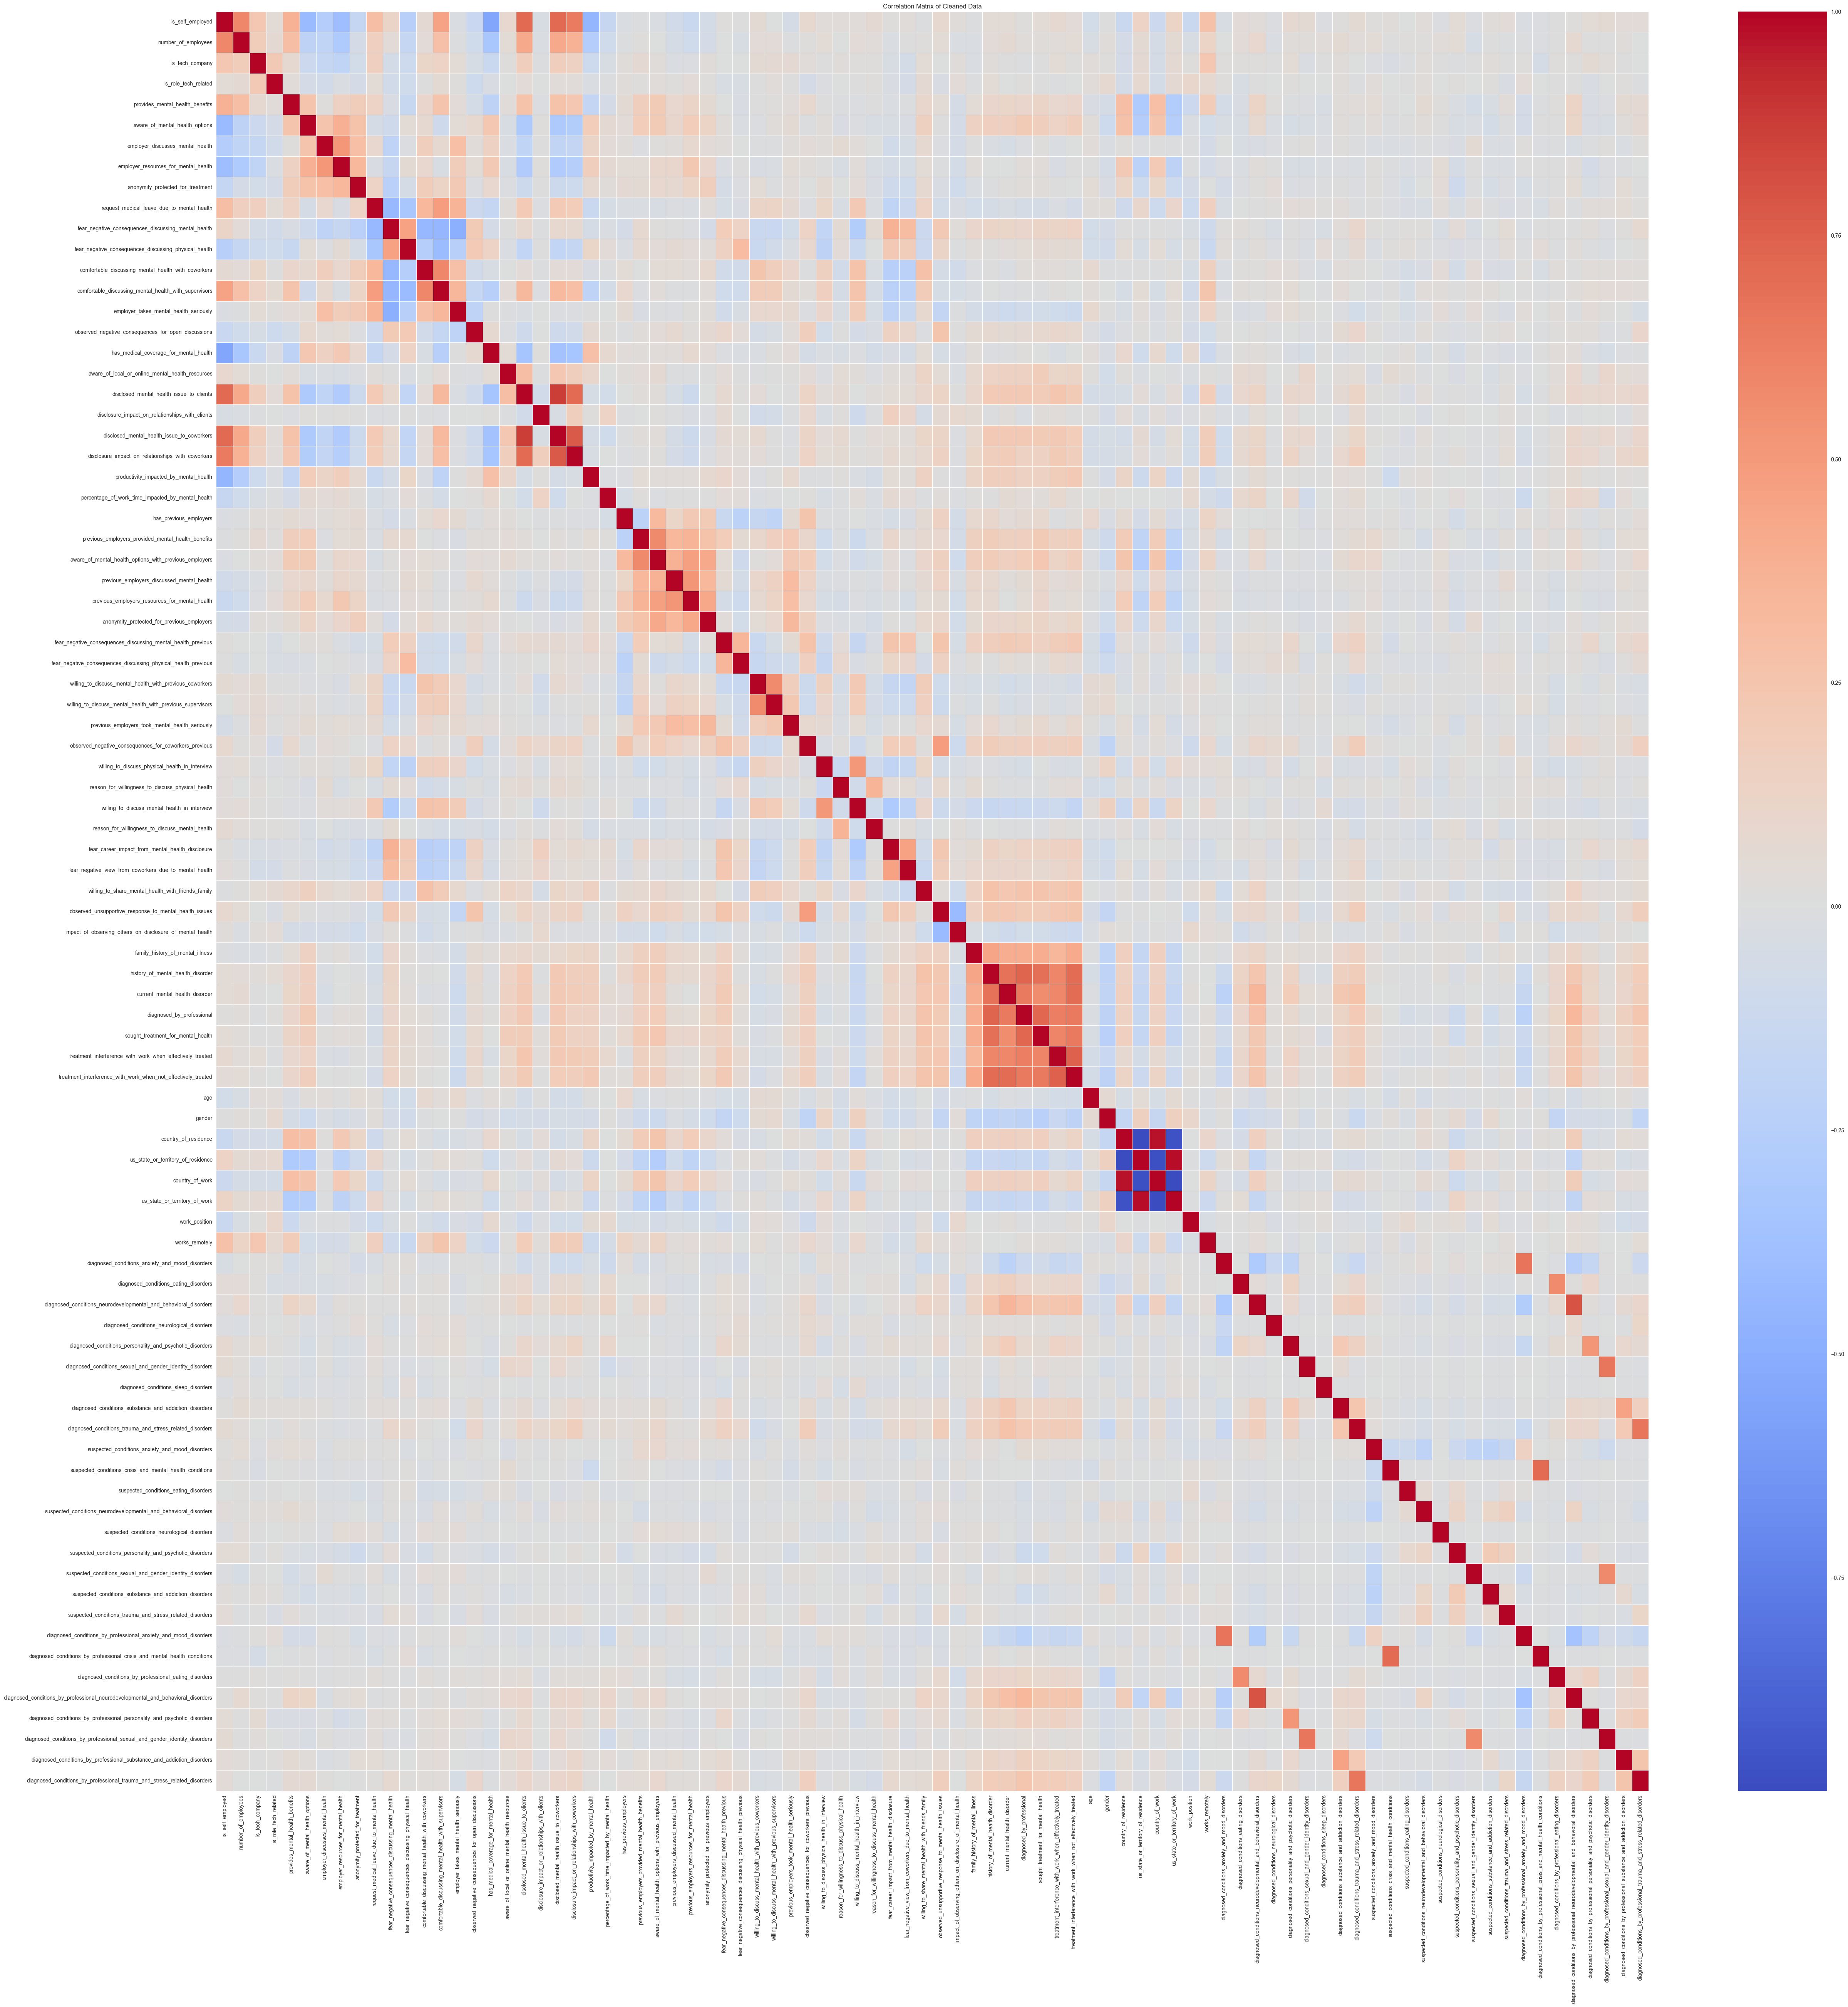

In [676]:
# Visualize correlation matrix and save 
scaled_data.to_csv('Cleaned_Scaled_MH_Data.csv', index=False)

plt.figure(figsize=(60, 60))
sns.heatmap(scaled_data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Cleaned Data")
plt.show()

# UMAP

In [677]:
# Initialize PCA and fit to data to retain 95% of the variance
umap_model = UMAP(n_components=2)
umap_data = umap_model.fit_transform(scaled_data)

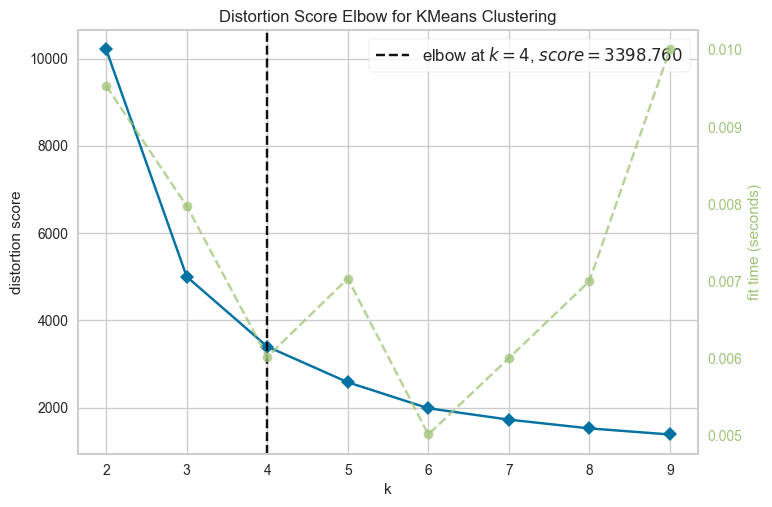

In [678]:
# Use KMeans for clustering with UMAP data
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(umap_data)
visualizer.show()

# Apply clustering
optimal_clusters = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(umap_data)
scaled_data['Cluster'] = kmeans_labels

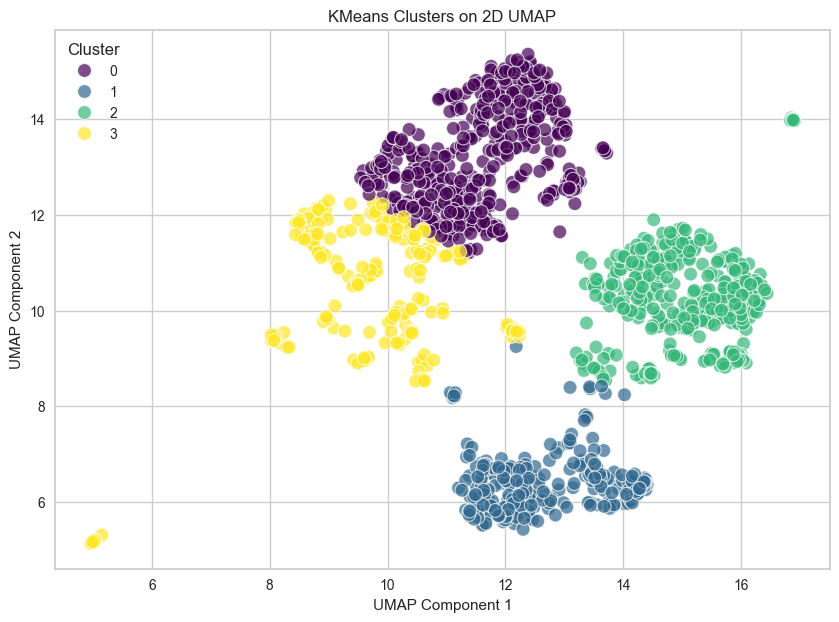

Silhouette Score: 0.5202415
Calinski-Harabasz Score: 1927.3460358563807
Davies-Bouldin Score: 0.7135457112348266


In [679]:
# 2D Visualise clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=kmeans_labels, palette='viridis', s=100, alpha=0.7)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("KMeans Clusters on 2D UMAP")
plt.legend(title='Cluster')
plt.show()

# Calculate evaluation metrics
silhouette_avg = silhouette_score(umap_data, kmeans_labels)
calinski_harabasz = calinski_harabasz_score(umap_data, kmeans_labels)
davies_bouldin = davies_bouldin_score(umap_data, kmeans_labels)

print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)

In [680]:
# Summary statistics for each cluster
cluster_summary = scaled_data.groupby('Cluster').mean()
print("\nCluster Characteristics Summary:")
print(cluster_summary)


Cluster Characteristics Summary:
         is_self_employed  number_of_employees  is_tech_company  \
Cluster                                                           
0               -0.485169            -0.262579        -0.109889   
1                1.897945             1.130890         0.455260   
2               -0.488247            -0.330960        -0.067747   
3               -0.316424            -0.175365        -0.166703   

         is_role_tech_related  provides_mental_health_benefits  \
Cluster                                                          
0                    0.102851                         0.135458   
1                    0.102851                         0.686091   
2                    0.102851                        -0.728631   
3                   -0.468409                         0.171471   

         aware_of_mental_health_options  employer_discusses_mental_health  \
Cluster                                                                     
0           

# Extra


In [681]:
for cluster in scaled_data['Cluster'].unique():
    print(f"\nCluster {cluster} Top Features:")
    print(cluster_summary.loc[cluster].sort_values(ascending=False).head(round( len(scaled_data.columns) / len(scaled_data['Cluster'].unique()) )))



Cluster 2 Top Features:
us_state_or_territory_of_residence                                 1.093613
us_state_or_territory_of_work                                      1.086286
has_medical_coverage_for_mental_health                             0.276829
productivity_impacted_by_mental_health                             0.222813
suspected_conditions_substance_and_addiction_disorders             0.220468
suspected_conditions_eating_disorders                              0.209165
gender                                                             0.206448
diagnosed_conditions_anxiety_and_mood_disorders                    0.178937
diagnosed_conditions_by_professional_anxiety_and_mood_disorders    0.168985
suspected_conditions_personality_and_psychotic_disorders           0.158203
willing_to_discuss_mental_health_in_interview                      0.155601
employer_discusses_mental_health                                   0.149724
age                                                            

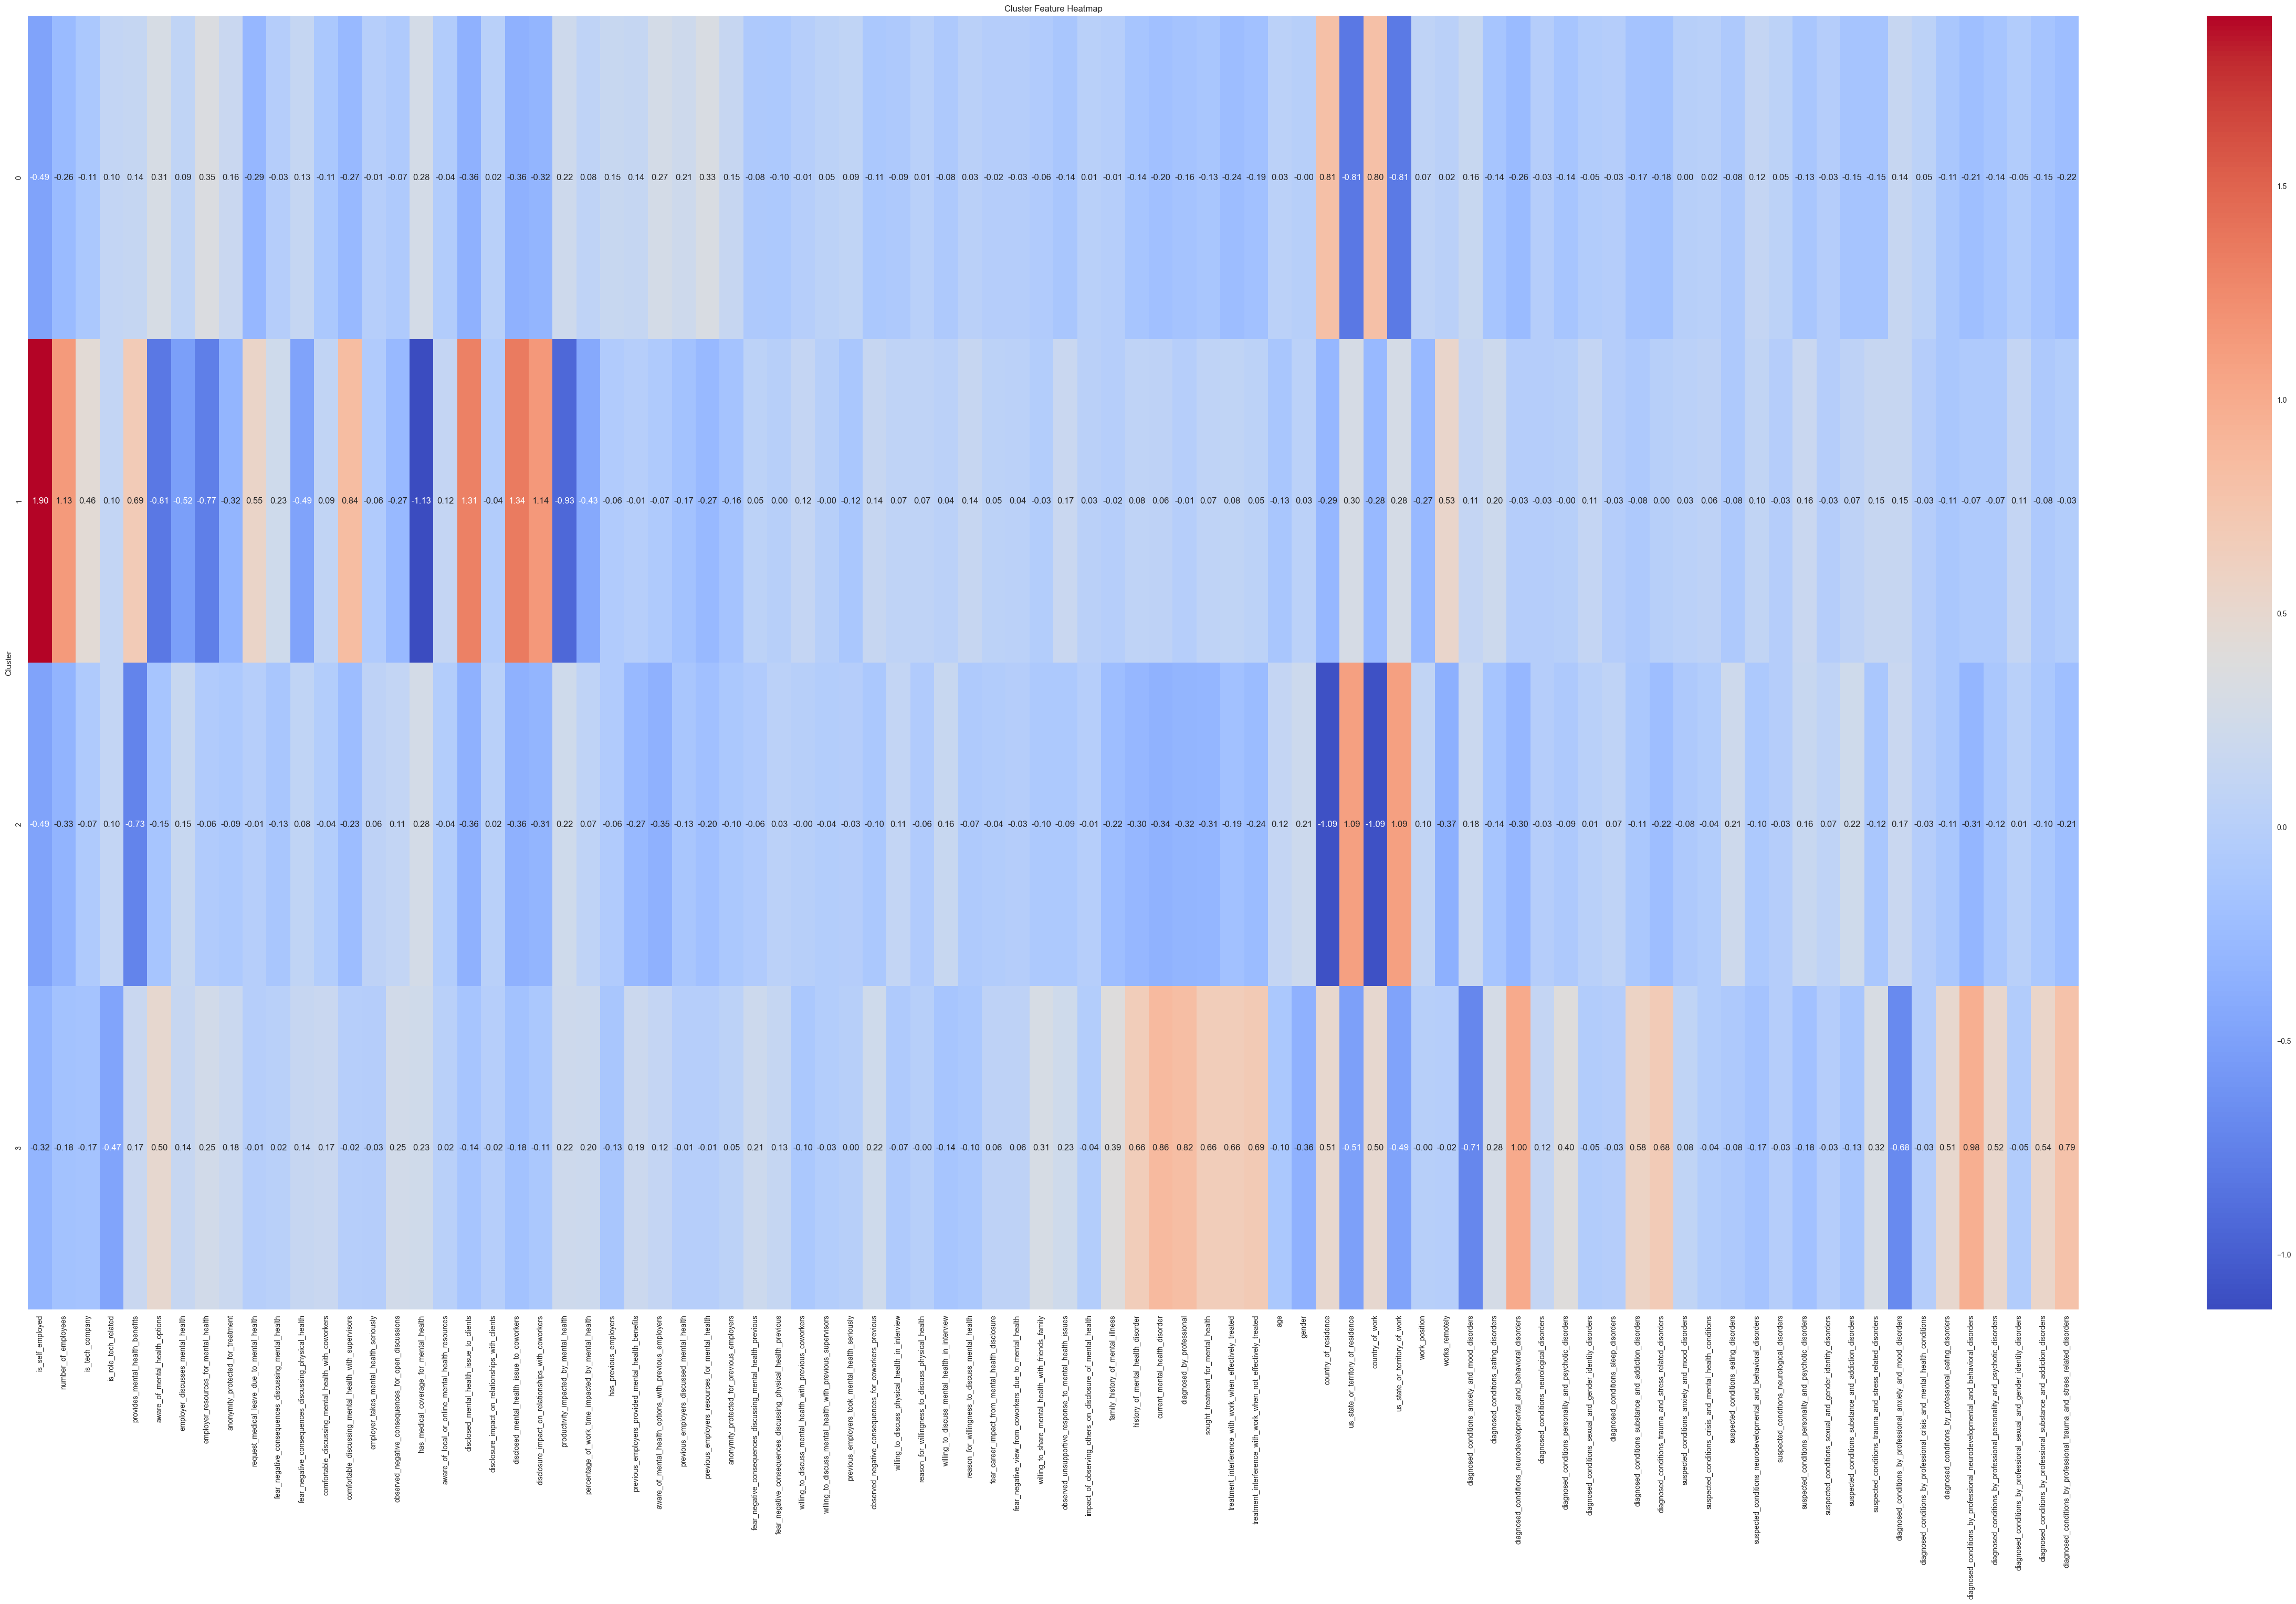

In [683]:
plt.figure(figsize=(63, 32))
sns.heatmap(cluster_summary, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Cluster Feature Heatmap")
plt.show()